In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Load the dataset
df = pd.read_csv('Bird Strikes.csv', encoding='utf-8')

# Display basic information about the dataset
print(df.info())

# Show the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Record ID                                12086 non-null  int64  
 1   Aircraft: Type                           12059 non-null  object 
 2   Airport: Name                            12059 non-null  object 
 3   Altitude bin                             12059 non-null  object 
 4   Aircraft: Make/Model                     12086 non-null  object 
 5   Wildlife: Number struck                  12059 non-null  object 
 6   Wildlife: Number Struck Actual           12086 non-null  int64  
 7   Effect: Impact to flight                 1274 non-null   object 
 8   FlightDate                               12059 non-null  object 
 9   Effect: Indicated Damage                 12086 non-null  object 
 10  Aircraft: Number of engines?             11962

In [ ]:
# Handle missing values
# For simplicity, we'll fill missing values with 'Unknown' for categorical data and 0 for numerical data
df['Aircraft: Type'].fillna('Unknown', inplace=True)
df['Airport: Name'].fillna('Unknown', inplace=True)
df['Altitude bin'].fillna('Unknown', inplace=True)
df['Wildlife: Number struck'].fillna('Unknown', inplace=True)
df['Effect: Impact to flight'].fillna('Unknown', inplace=True)
df['Conditions: Precipitation'].fillna('Unknown', inplace=True)
df['Remarks'].fillna('No Remarks', inplace=True)
df['Conditions: Sky'].fillna('Unknown', inplace=True)
df['Wildlife: Species'].fillna('Unknown', inplace=True)
df['Pilot warned of birds or wildlife?'].fillna('Unknown', inplace=True)
df['Cost: Total $'].fillna(0, inplace=True)
df['Feet above ground'].fillna(0, inplace=True)
df['Number of people injured'].fillna(0, inplace=True)

# Convert 'FlightDate' to datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

# Display the updated dataframe info and head
print(df.info())
print(df.head())

<ipython-input-3-f5dfc45d2dba>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                12086 non-null  int64         
 1   Aircraft: Type                           12086 non-null  object        
 2   Airport: Name                            12086 non-null  object        
 3   Altitude bin                             12086 non-null  object        
 4   Aircraft: Make/Model                     12086 non-null  object        
 5   Wildlife: Number struck                  12086 non-null  object        
 6   Wildlife: Number Struck Actual           12086 non-null  int64         
 7   Effect: Impact to flight                 12086 non-null  object        
 8   FlightDate                               12059 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

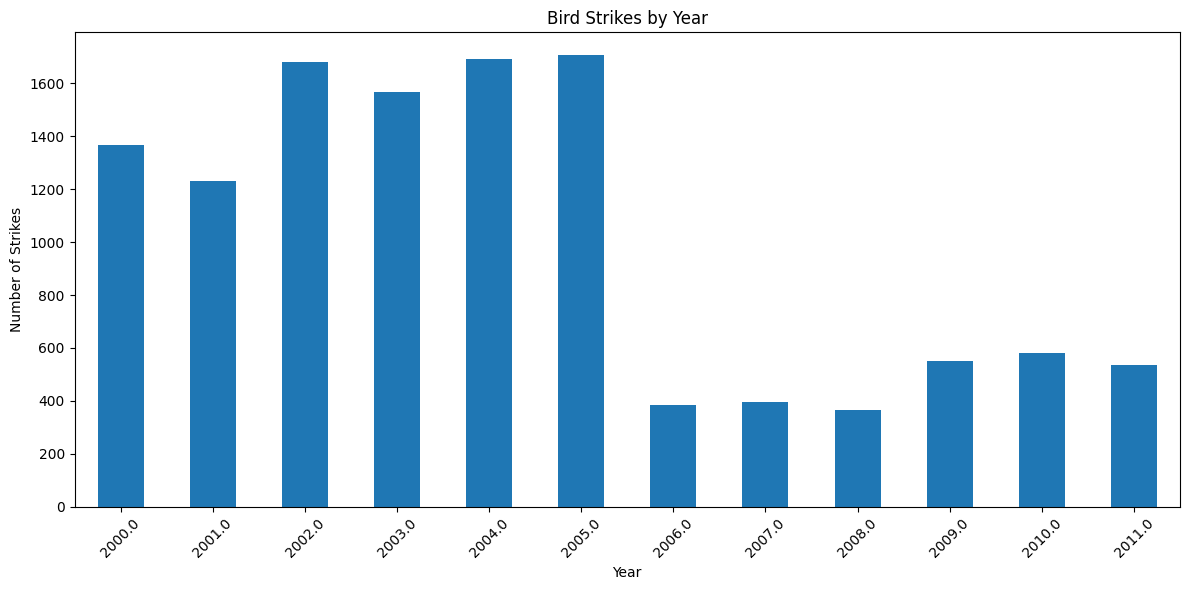

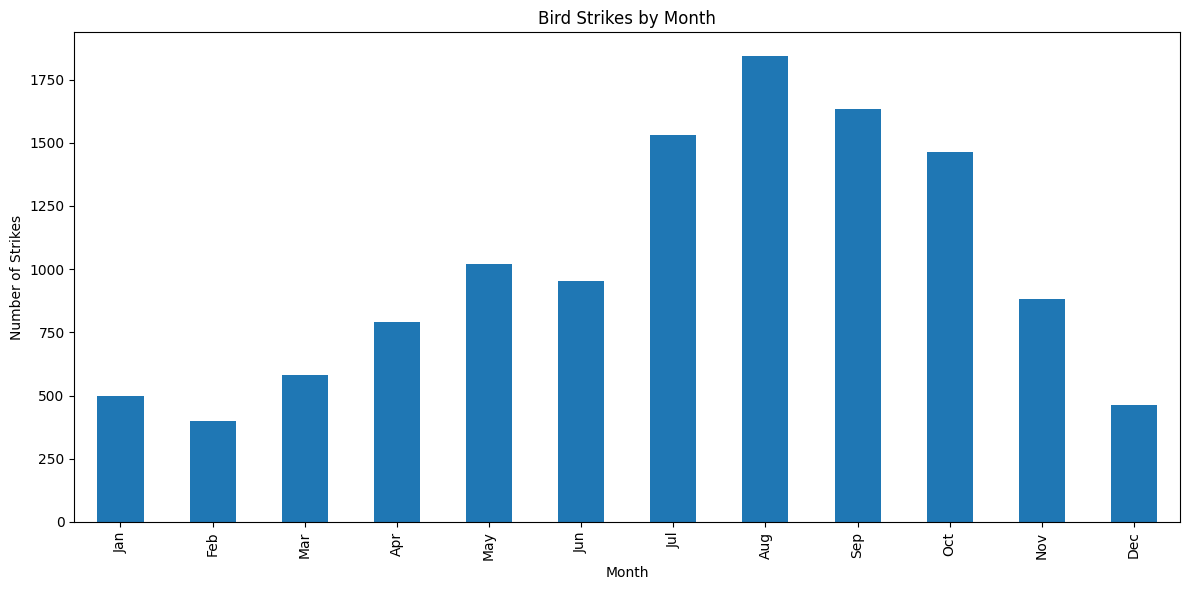

In [ ]:
# Extract year and month from FlightDate
df['Year'] = df['FlightDate'].dt.year
df['Month'] = df['FlightDate'].dt.month

# Plot bird strikes by year
plt.figure(figsize=(12, 6))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Bird Strikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bird strikes by month
plt.figure(figsize=(12, 6))
df['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Bird Strikes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Strikes')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [ ]:
# Analysis of Impact and Damage

# Effect on Flight
effect_on_flight = df['Effect: Impact to flight'].value_counts().head()
print("\nEffect on Flight:")
print(effect_on_flight)

# Indicated Damage
indicated_damage = df['Effect: Indicated Damage'].value_counts()
print("\nIndicated Damage:")
print(indicated_damage)

# Cost Analysis
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')
total_cost = df['Cost: Total $'].sum()
average_cost = df['Cost: Total $'].mean()
max_cost = df['Cost: Total $'].max()

print("\nTotal cost of damage: ${:,.2f}".format(total_cost))
print("Average cost per incident: ${:.2f}".format(average_cost))
print("Maximum cost for a single incident: ${:,.2f}".format(max_cost))

# Visualizations

# Effect on Flight
plt.figure(figsize=(12, 6))
effect_on_flight.plot(kind='bar')
plt.title('Top 5 Effects on Flight')
plt.xlabel('Effect on Flight')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('effect_on_flight.png')
plt.close()

# Indicated Damage
plt.figure(figsize=(10, 6))
indicated_damage.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Indicated Damage')
plt.ylabel('')
plt.tight_layout()
plt.savefig('indicated_damage.png')
plt.close()

# Cost Distribution
plt.figure(figsize=(12, 6))
df['Cost: Total $'].apply(lambda x: np.log1p(x) if x > 0 else 0).hist(bins=50)
plt.title('Distribution of Damage Costs (Log Scale)')
plt.xlabel('Log(Cost + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('cost_distribution.png')
plt.close()

print("Visualizations have been saved as PNG files.")


Effect on Flight:
Effect: Impact to flight
Unknown                  10812
Precautionary Landing      681
Aborted Take-off           313
Other                      220
Engine Shut Down            60
Name: count, dtype: int64

Indicated Damage:
Effect: Indicated Damage
No damage        10670
Caused damage     1416
Name: count, dtype: int64

Total cost of damage: $46,547.00
Average cost per incident: $4.01
Maximum cost for a single incident: $976.00
Visualizations have been saved as PNG files.


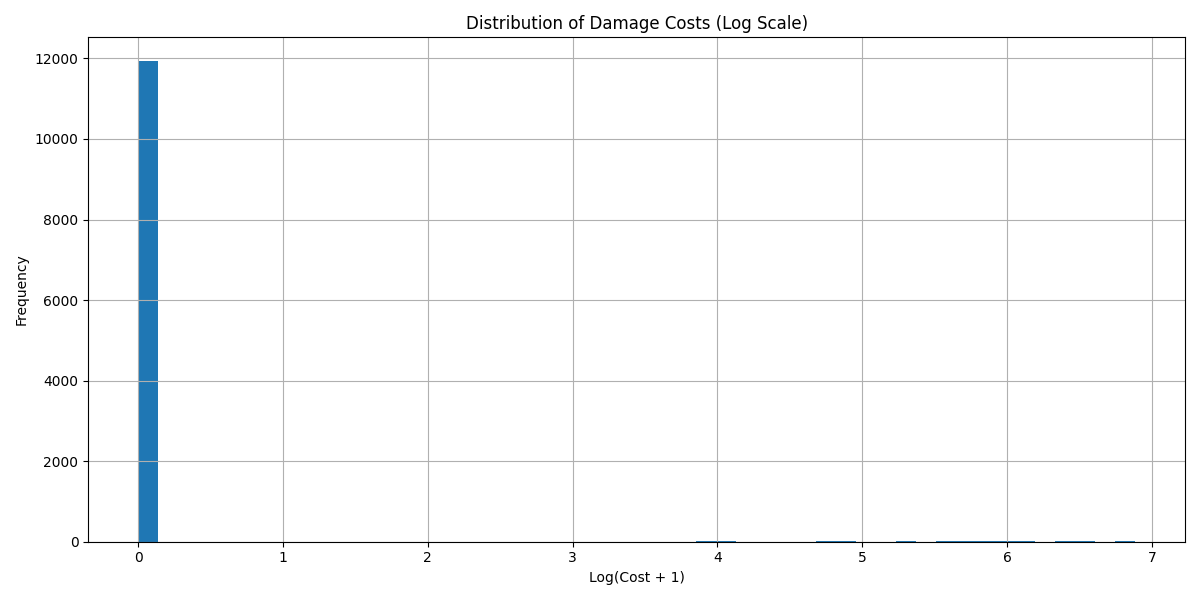

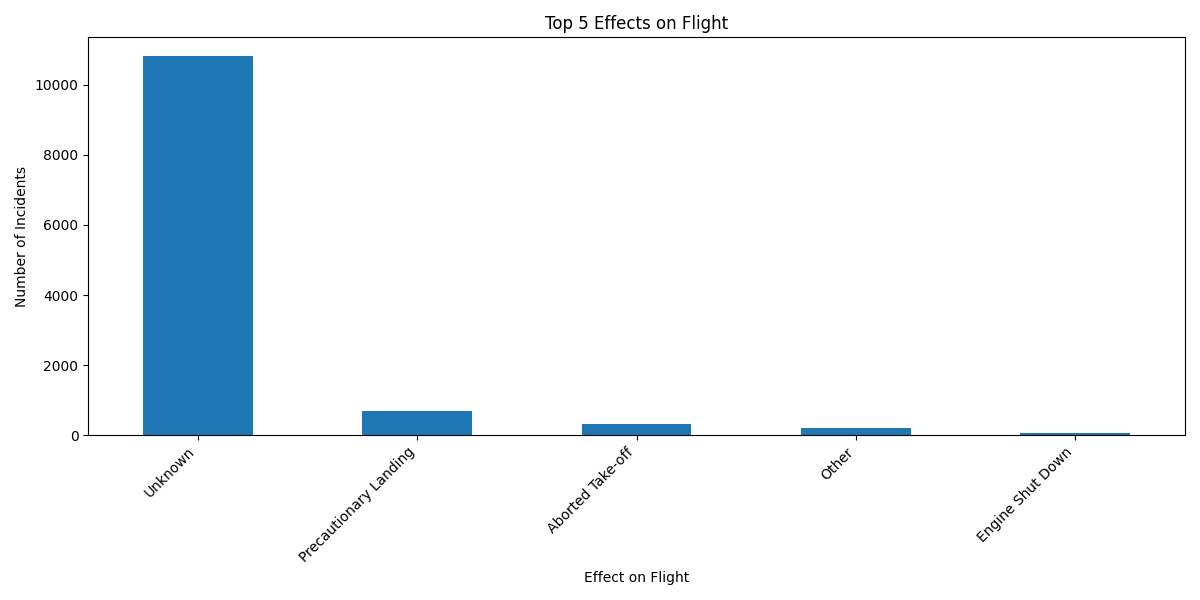

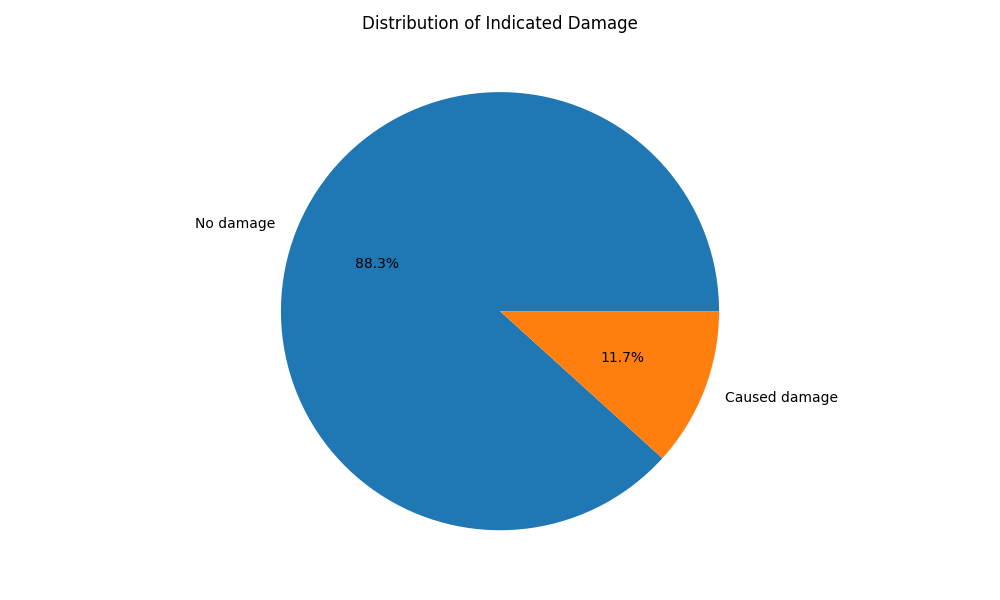

Images displayed.


In [ ]:
from IPython.display import Image, display

# Display the images
images = ['cost_distribution.png', 'effect_on_flight.png', 'indicated_damage.png']
for img in images:
    display(Image(filename=img))

print("Images displayed.")